In [ ]:
!pip install cairosvg

Text(0.5, 1.0, 'Nextflow Task Landscape\nIcon size = Avg Duration')

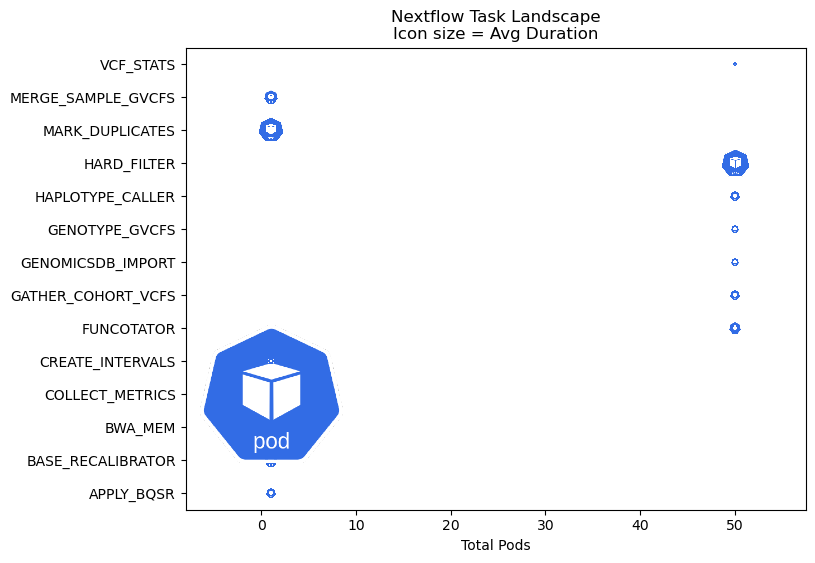

In [8]:
import cairosvg
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import requests
from io import BytesIO
import numpy as np
from PIL import Image


df = pd.read_csv('nf_final_results.csv')
plot_data = df.groupby("process").agg(
    pod_count=("process", "count"),
    avg_duration=("duration_sec", "mean")
).reset_index()

url = "https://raw.githubusercontent.com/kubernetes/community/master/icons/svg/resources/labeled/pod.svg"
svg_data = requests.get(url).content

# Convert SVG → PNG in memory
png_bytes = cairosvg.svg2png(bytestring=svg_data, output_width=256)
pod_img = Image.open(BytesIO(png_bytes))
pod_array = np.array(pod_img)

fig, ax = plt.subplots(figsize=(8, 6))

y_pos = np.arange(len(plot_data))

ax.set_xlim(-8, plot_data["pod_count"].max() * 1.15)
ax.set_ylim(-0.5, len(plot_data) - 0.5)

for i, row in plot_data.iterrows():
    zoom = row["avg_duration"] / plot_data["avg_duration"].max() * 0.4
    ab = AnnotationBbox(
        OffsetImage(pod_array, zoom=zoom),
        (row["pod_count"], i),
        frameon=False
    )
    ax.add_artist(ab)
    
ax.set_yticks(y_pos)
ax.set_yticklabels(plot_data["process"])
ax.set_xlabel("Total Pods")
ax.set_title("Nextflow Task Landscape\nIcon size = Avg Duration")

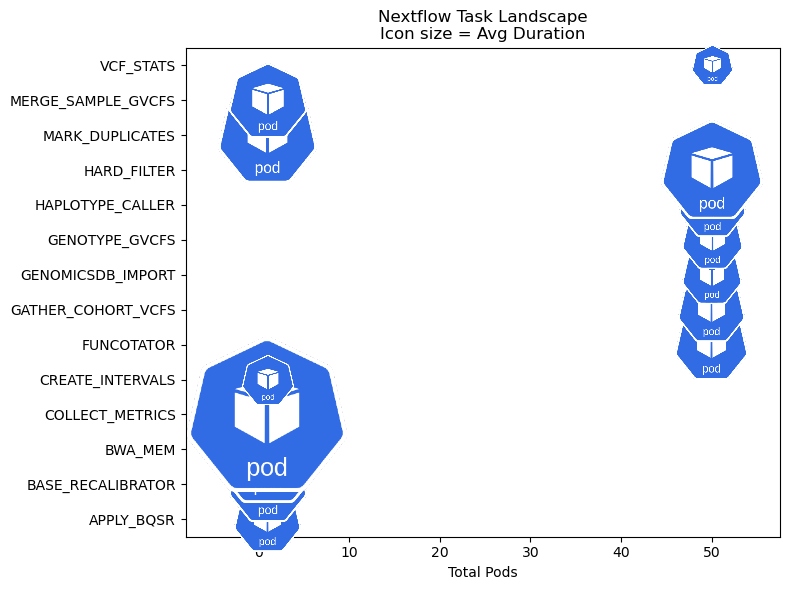

In [7]:
plot_data = df.groupby("process").agg(
    pod_count=("process", "count"),
    avg_duration=("duration_sec", "mean")
).reset_index()

# Load SVG
url = "https://raw.githubusercontent.com/kubernetes/community/master/icons/svg/resources/labeled/pod.svg"
svg_data = requests.get(url).content

# Convert SVG → PNG
png_bytes = cairosvg.svg2png(bytestring=svg_data, output_width=256)
pod_array = np.array(Image.open(BytesIO(png_bytes)))

fig, ax = plt.subplots(figsize=(8, 6))
y_pos = np.arange(len(plot_data))

ax.set_xlim(-8, plot_data["pod_count"].max() * 1.15)
ax.set_ylim(-0.5, len(plot_data) - 0.5)

dur = plot_data["avg_duration"]
size_scaled = np.log1p(dur) / np.log1p(dur).max()

for i, row in plot_data.iterrows():
    zoom = size_scaled.iloc[i] * 0.45  # control absolute size
    ab = AnnotationBbox(
        OffsetImage(pod_array, zoom=zoom),
        (row["pod_count"], i),
        frameon=False
    )
    ax.add_artist(ab)

ax.set_yticks(y_pos)
ax.set_yticklabels(plot_data["process"])
ax.set_xlabel("Total Pods")
ax.set_title("Nextflow Task Landscape\nIcon size = Avg Duration")

plt.tight_layout()
plt.show()


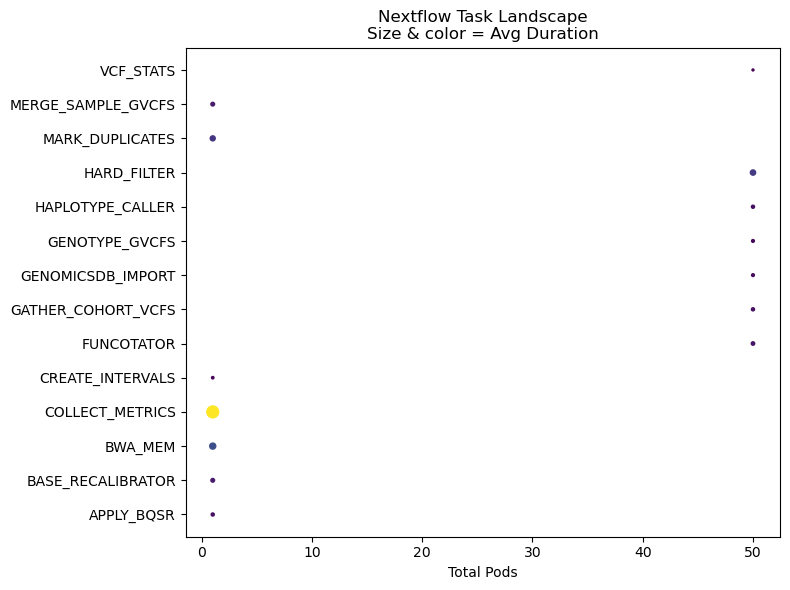

In [11]:
fig, ax = plt.subplots(figsize=(8, 6))
y_pos = np.arange(len(plot_data))


# Size encoding (log)
size = plot_data["avg_duration"]
# size = np.log1p(plot_data["avg_duration"])
# size = size / size.max() * 800  # marker area

ax.scatter(
    plot_data["pod_count"],
    y_pos,
    s=size,
    c=plot_data["avg_duration"],
)

ax.set_yticks(y_pos)
ax.set_yticklabels(plot_data["process"])
ax.set_xlabel("Total Pods")
ax.set_title("Nextflow Task Landscape\nSize & color = Avg Duration")

plt.tight_layout()
plt.show()
